In [1]:
import pyaudio
import struct
import numpy as np
import matplotlib.pyplot as plt
import sys

%matplotlib notebook

CHUNK = 1024 * 2
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100


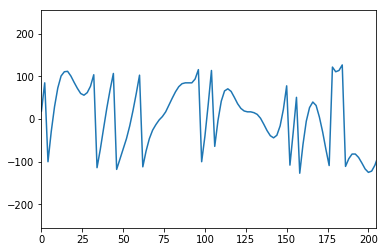

In [2]:
p = pyaudio.PyAudio()

stream = p.open(
                format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True,
                output = True,
                frames_per_buffer = CHUNK)

fig, ax = plt.subplots()

x = np.arange(0, 2 * CHUNK, 2)
line, = ax.plot(x, np.random.rand(CHUNK))
ax.set_ylim(-255, 255)
ax.set_xlim(0, 0.1 * CHUNK)

try:
    while True:
        data = stream.read(CHUNK)
        data_int = np.array(struct.unpack(str(2 * CHUNK) + 'B', data), dtype = 'b')[::2] + 127
        line.set_ydata(data_int)
        fig.canvas.draw()
        fig.canvas.flush_events()
except KeyboardInterrupt:
    pass